# Assignment_4 DT

In [57]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [58]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

feat_names = np.array(iris.feature_names)

tree_clf_depth_2 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf_depth_2.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Q1 Plot decision tree using export_graphviz

In [59]:
# Answer:
from graphviz import Source
from sklearn.tree import export_graphviz
import pydotplus

def graphiz_output(clf, features_names, class_names , outfile=None, filled=True, rounded=True, special_characters=True):
    return export_graphviz(
    clf,
    out_file=outfile,
    feature_names=features_names,
    class_names=class_names,
    filled=filled,
    rounded=rounded,
    special_characters=special_characters
)


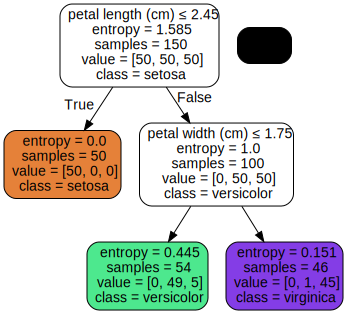

In [60]:
# Answer:

from graphviz import Source
from sklearn.tree import export_graphviz
import pydotplus

# Export decision tree to graphviz format
dot_data = graphiz_output(tree_clf_depth_2, feat_names[2:4], iris.target_names)

# Create graph from dot data
tree_plot_depth_2 = pydotplus.graph_from_dot_data(dot_data)

# Show graph in Jupyter Notebook
Source(tree_plot_depth_2.to_string())

## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [61]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

### Plotting for max_depth = 2

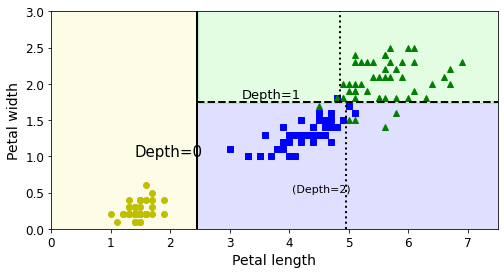

In [62]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf_depth_2, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

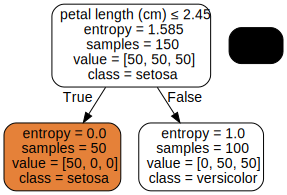

In [63]:
tree_clf_depth_1 = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
tree_clf_depth_1.fit(X, y)

# Export decision tree to graphviz format
dot_data = graphiz_output(tree_clf_depth_1, feat_names[2:4], iris.target_names)

# Create graph from dot data
tree_plot_depth_1 = pydotplus.graph_from_dot_data(dot_data)

# Show graph in Jupyter Notebook
Source(tree_plot_depth_1.to_string())

### Plotting for max_depth = 1

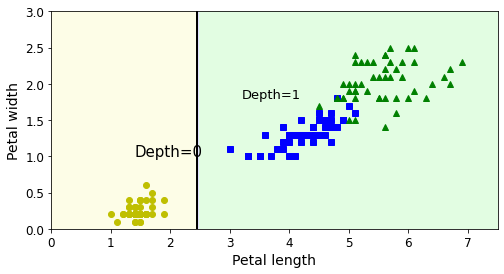

In [64]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf_depth_1, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)

plt.show()

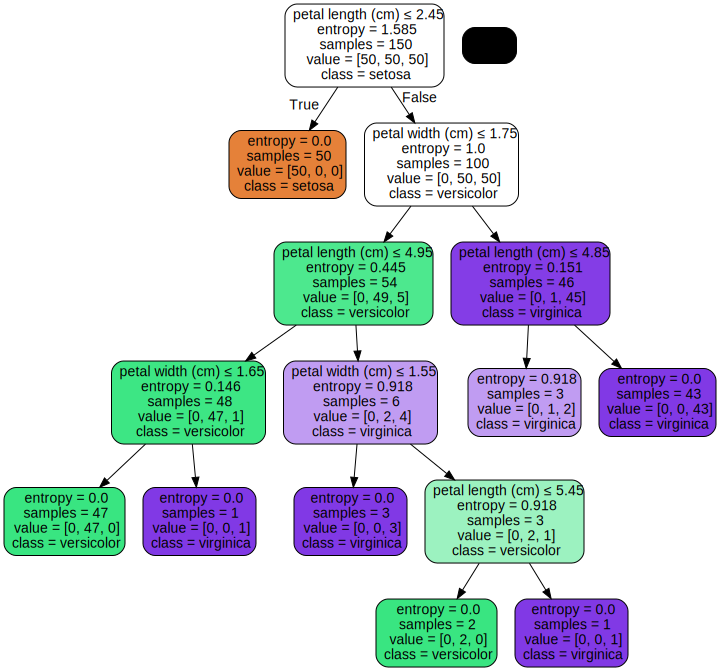

In [65]:
tree_clf_depth_10 = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
tree_clf_depth_10.fit(X, y)

# Export decision tree to graphviz format
dot_data = graphiz_output(tree_clf_depth_10, feat_names[2:4], iris.target_names)

# Create graph from dot data
tree_plot_depth_10 = pydotplus.graph_from_dot_data(dot_data)

# Show graph in Jupyter Notebook
Source(tree_plot_depth_10.to_string())

**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

**Answer**

1.
- Depth 1 => Petal Length (1.585)
- Depth 2 => Petal Length True (0), Petal Length False (Petal Width) (1.0)
- Depth 3=> Petal Width True (0.445), Petal Width False (0.151)

2.
- The complexity and accuracy of the models in decision trees varies whether max_depth is set to 1, 2, or 10. With max_depth = 1, a decision tree will have just one split, resulting in a very simple model with low complexity but potentially inferior accuracy. The decision tree plot shows this as a single root node with only one decision rule.
- With max_depth = 2 (Accuracy Increased), a decision tree will have two splits, resulting in a somewhat more sophisticated model that can capture more subtle correlations between the input characteristics and the target variable. This may be visualised as a root node with two child nodes in the decision tree plot.
- With max_depth = 10, a decision tree will have numerous splits, resulting in a very complicated model that may overfit the training data and generalise poorly to new data. The decision tree plot shows this as an extremely deep tree with many decision rules.

### Q2.2

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

In [66]:
import numpy as np

def calculate_probability(clf, data_point):
    # get the leaf node reached by the input data point
    leaf_id = clf.apply(data_point)

    # get the class distribution for the leaf node
    class_counts = clf.tree_.value[leaf_id][0]

    # get the total number of samples that reached the leaf node
    total_samples = np.sum(class_counts)

    # calculate class probabilities for the input data point
    class_probabilities = class_counts / total_samples

    # print the resulting class probabilities
    return class_probabilities

## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

Classifier score on Original training data: 0.960


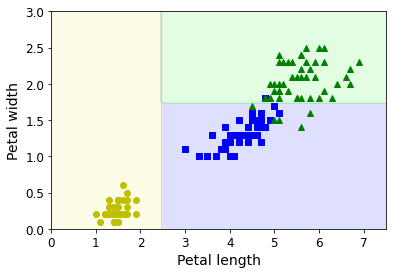

In [67]:
## we have already made a tree with max_depth = 2 on the original data and plotted the decision boundaries so we will skip that part
# calculate the score of the classifier on the training data
score = tree_clf_depth_2.score(X, y)
print("Classifier score on Original training data: {:.3f}".format(score))
plot_decision_boundary(tree_clf_depth_2, X, y)

The following cell rotates the data by angle 20

In [68]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

In [69]:
# fit a decision tree classifier to the rotated data
tree_clf_depth_2_rotated = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf_depth_2_rotated.fit(Xr, y)


DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

Classifier score on Rotated training data: 0.973


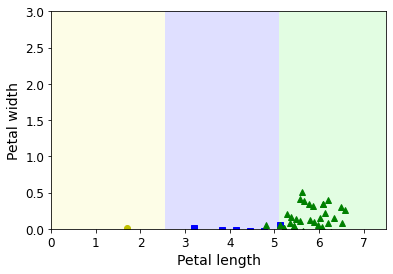

In [70]:
# calculate the score of the classifier on the rotated data

score_Xr = tree_clf_depth_2_rotated.score(Xr, y)
print("Classifier score on Rotated training data: {:.3f}".format(score_Xr))
plot_decision_boundary(tree_clf_depth_2_rotated, Xr, y)


### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [71]:
import numpy as np
def plot_logistic_regression(clf, X, y, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
  
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

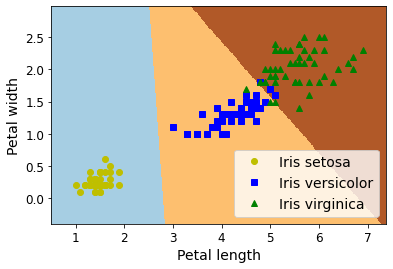

Classifier score on Original data: 0.9666666666666667


In [72]:
from sklearn.linear_model import LogisticRegression

# Fit a logistic regression classifier to the original data
LR_original = LogisticRegression(random_state=42)
LR_original.fit(X, y)

# Plot the decision boundaries
plot_logistic_regression(LR_original, X, y)

# Print the classifier score on the original data
print('Classifier score on Original data:', LR_original.score(X, y))

**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the classifier score on training data

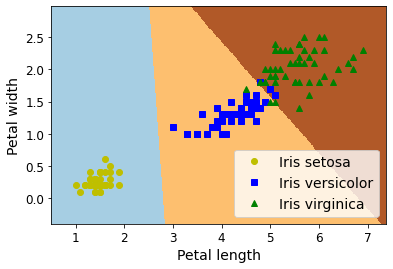

Classifier score on Rotated data: 0.9666666666666667


In [73]:

# Fit a logistic regression classifier to the rotated data
LR_rotated = LogisticRegression(random_state=42)
LR_rotated.fit(X, y)

# Plot the decision boundaries
plot_logistic_regression(LR_rotated, X, y)

# Print the classifier score on the rotated data
print('Classifier score on Rotated data:', LR_rotated.score(X, y))

### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**

1. When it comes to sensitivity, the decision tree are more sensitive to data since when we used the rotated data on the DT the accuracy changed while the logistic regression it stayed the same.

2. As Decision Tree applies concept learning So it is more affected by the distribution of the data as the model as the model is built by this way. While Logistic Regression transforms the data anyway to another domain and apply the maximum likelihood to get the final model, So it is not so affected by the transformation of data to it.

## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

In [74]:
from sklearn.datasets import make_moons

2. Split it into a training set and a test set using train_test_split().

In [75]:
moon_x, moon_y = make_moons(n_samples=10000, noise=0.4, random_state=42)

3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier. 
    - Choose reasonable values for each hyperparameter.

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(moon_x, moon_y, test_size=0.2, random_state=4)

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [1,2,3,4,5,8],
    'max_leaf_nodes': [1,2,3,4,5,6],
    'min_samples_split': [1,2,3,4,6,8,10]
}

tree_1 = DecisionTreeClassifier()

grid_search = GridSearchCV(tree_1, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyper Parameters: ", grid_search.best_params_)

Best Hyper Parameters:  {'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}


C:\Users\I1bra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\I1bra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\I1bra\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\I1bra\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\I1bra\anaconda3\lib\site-packages\sklearn\base.py", li

4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [78]:
from sklearn.metrics import accuracy_score

# create a decision tree classifier with the best hyper parameters found by the grid search
tree = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4, min_samples_split=2)

# train the classifier on the full training set
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

# Print the accuracy or mean squared error of the model on the test set
print("The Accuracy is:", accuracy_score(y_test, y_pred))

The Accuracy is: 0.8585


## Question 4 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**

1.  The make-depth = 2 tree has acceptable general representation of data while the max-depth = 5 has some sort of over-fitting to the data. for sure the 2 depth has less complexity while the 5 depth tree is more complexm
2. The max-depth = 5 tree has more variance since it has overfitting which cause high error due to noise.
3. The max-depth = 2 tree has more bias error since it's not complex

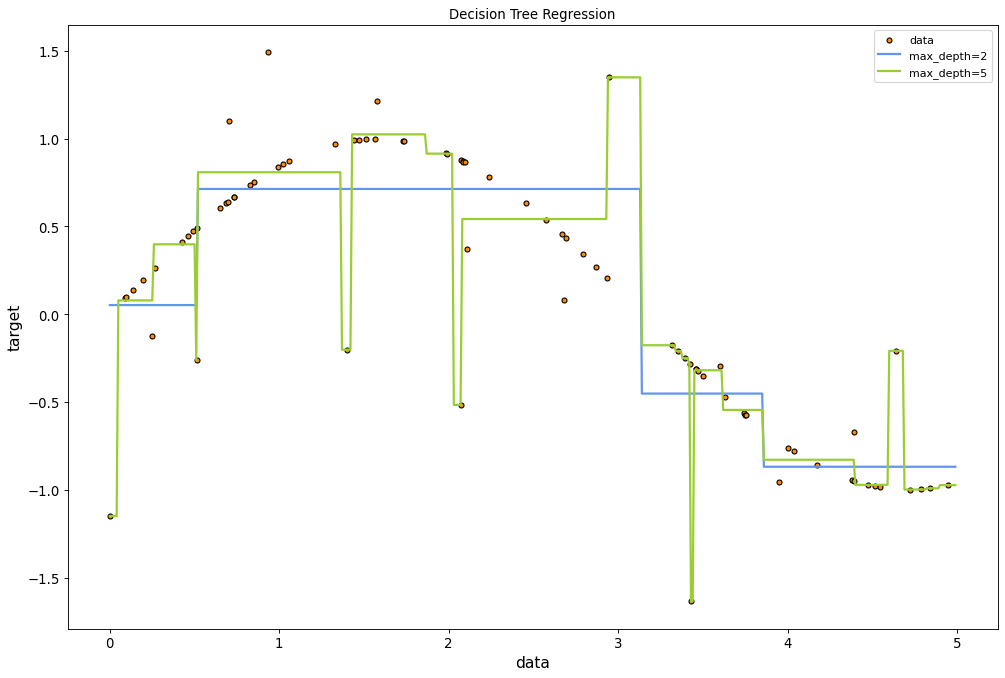

In [79]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()